In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import  matplotlib.pyplot as plt

2023-03-14 17:45:43.040929: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 17:45:43.635079: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-14 17:45:43.635104: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-14 17:45:45.566712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256,256),
    batch_size=32)


Found 2152 files belonging to 3 classes.


2023-03-14 17:45:48.035961: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-14 17:45:48.036294: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-14 17:45:48.036316: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (RSPL-89): /proc/driver/nvidia/version does not exist
2023-03-14 17:45:48.037646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
len(dataset)

68

In [5]:
68*32

2176

In [6]:
class_names=dataset.class_names

(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0]
(32, 256, 256, 3)
[1 0 0 0 1 1 1 1 0 0 0 1 2 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0

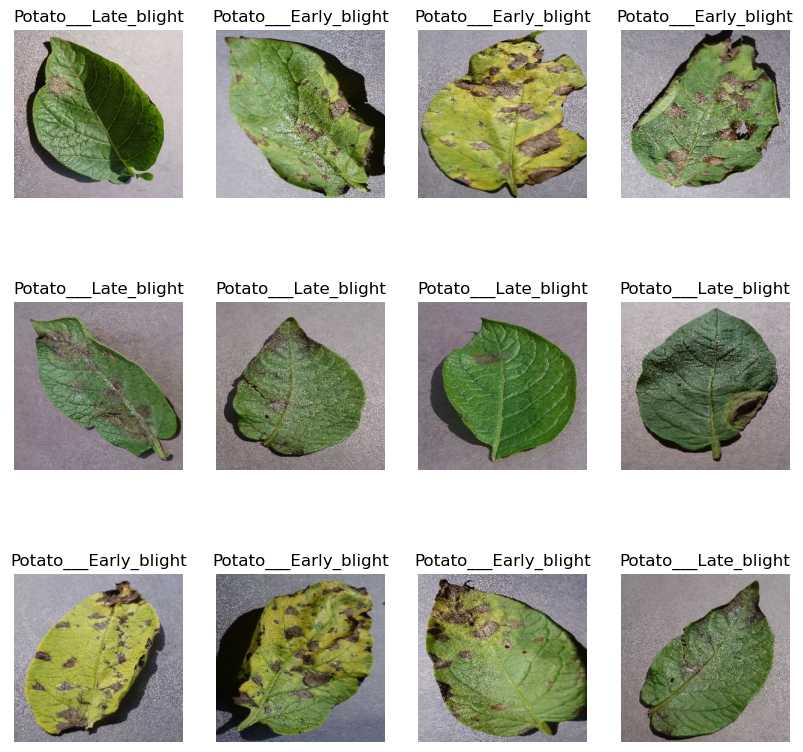

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
        print(image_batch.shape)
        print(label_batch.numpy())

In [8]:
train_size=0.8
train_ds=dataset.take(int(len(dataset)*train_size))

In [9]:
test_ds=dataset.skip(int(len(dataset)*train_size))

In [10]:
len(train_ds)

54

In [11]:
val_size=0.1
val_ds=test_ds.take(int(len(dataset)*val_size))

In [12]:
test_ds=test_ds.skip(int(len(dataset)*val_size))

In [13]:
train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE).shuffle(1000)

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE).shuffle(1000)

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE).shuffle(1000)

<ShuffleDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
model=models.Sequential([
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(len(class_names),activation="softmax")
])

model.build(input_shape=(32,256,256,3))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [19]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(),
metrics=['accuracy'])


In [20]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=val_ds)


Epoch 1/50
54/54 [==============================] - 79s 1s/step - loss: 0.9014 - accuracy: 0.4867 - val_loss: 0.8461 - val_accuracy: 0.7135
Epoch 2/50
54/54 [==============================] - 78s 1s/step - loss: 0.6909 - accuracy: 0.7060 - val_loss: 0.5240 - val_accuracy: 0.7708
Epoch 3/50
54/54 [==============================] - 78s 1s/step - loss: 0.4694 - accuracy: 0.8084 - val_loss: 0.4583 - val_accuracy: 0.8229
Epoch 4/50
54/54 [==============================] - 78s 1s/step - loss: 0.2998 - accuracy: 0.8843 - val_loss: 0.2303 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 78s 1s/step - loss: 0.2681 - accuracy: 0.9016 - val_loss: 0.2631 - val_accuracy: 0.8802
Epoch 6/50
54/54 [==============================] - 78s 1s/step - loss: 0.1747 - accuracy: 0.9300 - val_loss: 0.1977 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 78s 1s/step - loss: 0.1295 - accuracy: 0.9502 - val_loss: 0.1796 - val_accuracy: 0.9271
Epoch 8/50
54/54 [==

Epoch 42/50
54/54 [==============================] - 84s 2s/step - loss: 0.0359 - accuracy: 0.9855 - val_loss: 0.0433 - val_accuracy: 0.9844
Epoch 43/50
54/54 [==============================] - 83s 2s/step - loss: 0.0712 - accuracy: 0.9751 - val_loss: 0.0515 - val_accuracy: 0.9792
Epoch 44/50
54/54 [==============================] - 83s 2s/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.1506 - val_accuracy: 0.9531
Epoch 45/50
54/54 [==============================] - 83s 2s/step - loss: 0.0087 - accuracy: 0.9983 - val_loss: 0.0211 - val_accuracy: 0.9948
Epoch 46/50
54/54 [==============================] - 83s 2s/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0526 - val_accuracy: 0.9896
Epoch 47/50
54/54 [==============================] - 83s 2s/step - loss: 0.0473 - accuracy: 0.9838 - val_loss: 0.0175 - val_accuracy: 0.9948
Epoch 48/50
54/54 [==============================] - 83s 2s/step - loss: 0.0267 - accuracy: 0.9907 - val_loss: 0.1056 - val_accuracy: 0.9740
Epoch 49/50
5

In [21]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 341ms/step - loss: 0.0175 - accuracy: 0.9957


In [22]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [23]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
len(history.history['accuracy'])

50

In [25]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

<Figure size 800x800 with 0 Axes>

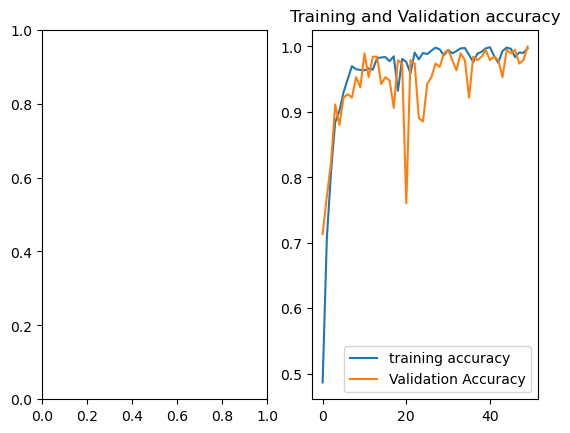

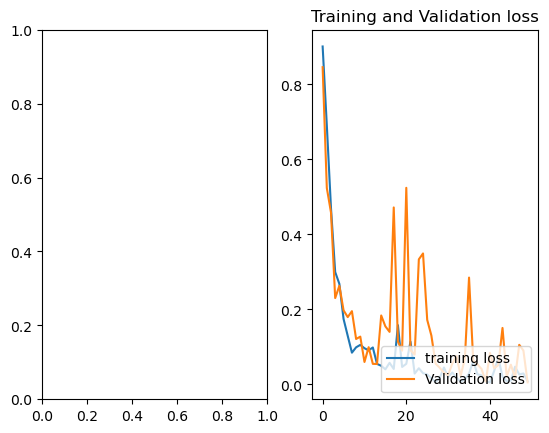

In [27]:
plt.figure(figsize=(8,8))
plt.subplots(1,2)
plt.plot(range(50),acc, label="training accuracy")
plt.plot(range(50),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation accuracy")

plt.subplots(1,2,)
plt.plot(range(50),loss, label="training loss")
plt.plot(range(50),val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title("Training and Validation loss")

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype('uint8')